<a href="https://www.kaggle.com/code/mikedelong/exploratory-data-analysis-with-map?scriptVersionId=134956507" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

filename = '../input/electric-vehicle-data-1997-2024-update-version/us_car_data.csv'
usecols = ['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type', 'CAFV', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', 'Electric Utility',
       '2020 Census Tract', 'Longitude', 'latitude']
df = pd.read_csv(filepath_or_buffer=filename, usecols=usecols)
df.shape

(134474, 17)

In [2]:
# hey look! everyone in this dataset is in Washington State!
df['State'].value_counts()

WA    134474
Name: State, dtype: int64

In [3]:
make_value_counts = df['Make'].value_counts()
make_df = pd.DataFrame(data={'Make': make_value_counts.index, 'Count': make_value_counts.values}).reset_index(drop=True)
make_df.head(10)

,Make,Count
0,TESLA,61650
1,NISSAN,13138
2,CHEVROLET,11417
3,FORD,6876
4,BMW,5881
5,KIA,5484
6,TOYOTA,4857
7,VOLKSWAGEN,3518
8,VOLVO,2965
9,AUDI,2720


In [4]:
import plotly.express as px
make_df.loc[make_df['Count'] < 2000, 'Make'] = 'Other' # we have too many makes so let's apply a threshold
pie_figure = px.pie(make_df, names='Make', values='Count')
pie_figure.show()

<Axes: xlabel='Year'>

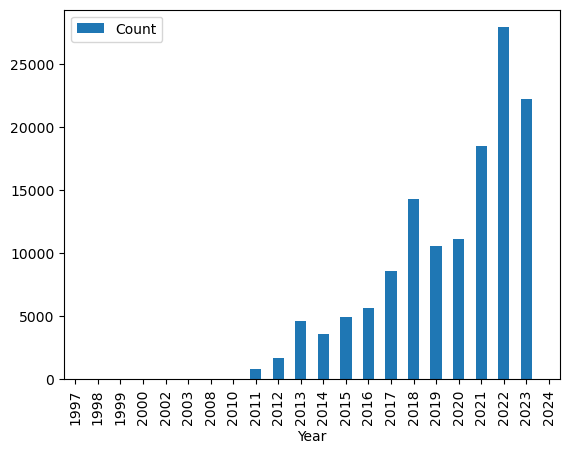

In [5]:
year_value_counts = df['Model Year'].value_counts()
year_df = pd.DataFrame(data={'Year': year_value_counts.index, 'Count': year_value_counts.values})
year_df = year_df.sort_values(by='Year').set_index('Year')
year_df.plot(kind='bar')

<Axes: xlabel='Longitude', ylabel='latitude'>

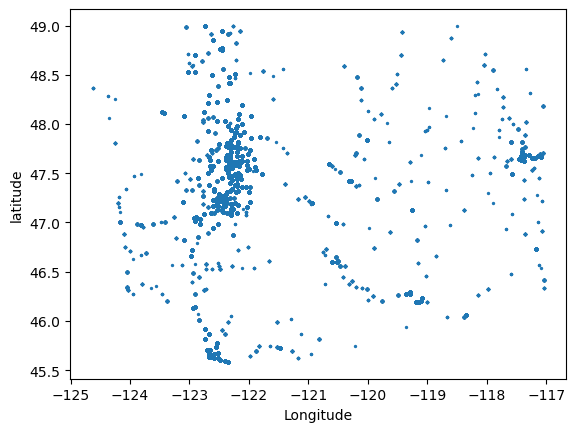

In [6]:
# we can plot all of the data in a static map
df.plot(kind='scatter', s=2, x='Longitude', y='latitude')